<a href="https://colab.research.google.com/github/luciapapalini/transformers-hands-on/blob/main/transformers-intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 Transformer Hands-on (30 minutes)

Welcome! In this short interactive session, we’ll explore what a Transformer model does and see it in action as it **completes sentences**.

🎯 **Goal**: Get an intuitive idea of what a Transformer is and try using a pre-trained model with just a few lines of code.


In [9]:
# Fissa numpy a una versione compatibile con torch
#!pip install numpy==1.26.4 --force-reinstall

In [10]:
import numpy as np

# 1) Define the sentence here (modify as desired)
sentence = "Sarah carried a light bag walking under the light"
tokens = sentence.lower().split()
print("Tokens:", tokens)

# 2) Set a small embedding dimension for clarity
embed_dim = 8

# 3) Simulate original embeddings: one unique vector per word
np.random.seed(0)
unique_tokens = list(dict.fromkeys(tokens))  # preserve order, remove duplicates
token_embeddings = {token: np.random.randn(embed_dim) for token in unique_tokens}

# 4) Build embeds array from token_embeddings dict
embeds = np.vstack([token_embeddings[token] for token in tokens])

# 5) Positional encoding function
def positional_encoding(position, d_model):
    angle_rates = 1 / np.power(10000, (2 * (np.arange(d_model)//2)) / np.float32(d_model))
    angle_rads = np.arange(position)[:, None] * angle_rates[None, :]
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return angle_rads

# 6) Compute positional encodings
pos_enc = positional_encoding(len(tokens), embed_dim)

# 7) Compute final embeddings = original + positional
embeds_final = embeds + pos_enc

# 8) Display original, positional, and final embeddings for each token
for i, token in enumerate(tokens):
    print(f"\nToken '{token}' (position {i}):")
    print("  Original embedding   :", np.round(embeds[i], 3).tolist())
    print("  Positional encoding  :", np.round(pos_enc[i], 3).tolist())
    print("  Final embedding (sum):", np.round(embeds_final[i], 3).tolist())

Tokens: ['sarah', 'carried', 'a', 'light', 'bag', 'walking', 'under', 'the', 'light']

Token 'sarah' (position 0):
  Original embedding   : [1.764, 0.4, 0.979, 2.241, 1.868, -0.977, 0.95, -0.151]
  Positional encoding  : [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]
  Final embedding (sum): [1.764, 1.4, 0.979, 3.241, 1.868, 0.023, 0.95, 0.849]

Token 'carried' (position 1):
  Original embedding   : [-0.103, 0.411, 0.144, 1.454, 0.761, 0.122, 0.444, 0.334]
  Positional encoding  : [0.841, 0.54, 0.1, 0.995, 0.01, 1.0, 0.001, 1.0]
  Final embedding (sum): [0.738, 0.951, 0.244, 2.449, 0.771, 1.122, 0.445, 1.334]

Token 'a' (position 2):
  Original embedding   : [1.494, -0.205, 0.313, -0.854, -2.553, 0.654, 0.864, -0.742]
  Positional encoding  : [0.909, -0.416, 0.199, 0.98, 0.02, 1.0, 0.002, 1.0]
  Final embedding (sum): [2.403, -0.621, 0.512, 0.126, -2.533, 1.653, 0.866, 0.258]

Token 'light' (position 3):
  Original embedding   : [2.27, -1.454, 0.046, -0.187, 1.533, 1.469, 0.155, 0.378]
  Pos

In [11]:
import torch
import torch.nn as nn

In [12]:
vocab = ['sarah', 'carried', 'a', 'light', 'bag', 'walking', 'under', 'the']
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for word, idx in word2idx.items()}

In [13]:
sentence = "sarah carried a light bag walking under the light"
tokens = sentence.lower().split()
token_ids = [word2idx[word] for word in tokens]
input_tensor = torch.tensor(token_ids)  # shape: (seq_len,)

In [14]:
embed_dim = 8
embedding = nn.Embedding(num_embeddings=len(vocab), embedding_dim=embed_dim)

In [15]:
embedded = embedding(input_tensor)  # shape: (seq_len, embed_dim)
print(embedded.shape)

torch.Size([9, 8])


In [16]:
for word in tokens:
    idx = word2idx[word]
    emb_vector = embedding(torch.tensor(idx))
    print(f"{word} --> {emb_vector.detach()}")

sarah --> tensor([ 0.5741, -0.9435, -1.9656, -0.2821, -0.0827,  0.8848,  0.2652,  0.5177])
carried --> tensor([ 0.2008, -0.0506, -1.6861, -0.0897,  0.1684,  0.1878, -0.3633,  0.2207])
a --> tensor([ 0.8793,  1.2067,  0.5445, -0.7591, -0.0438, -0.2228, -0.7051, -1.7263])
light --> tensor([-0.4695, -1.3256, -0.1725,  0.4981, -0.9794,  0.9710, -0.2184,  1.2920])
bag --> tensor([-0.3758,  0.9681,  1.5595,  0.3181, -0.6194,  1.3583, -0.3230,  0.6396])
walking --> tensor([ 0.0817,  0.1384, -0.7240, -0.3441, -0.2814, -2.0109,  0.0933,  0.3151])
under --> tensor([-0.6268,  0.9661, -0.2136, -1.0438,  0.6579,  0.4479,  0.1956, -1.0607])
the --> tensor([-1.2268,  0.3483, -0.7766, -0.3959,  1.2333, -1.5436,  0.5567, -0.2426])
light --> tensor([-0.4695, -1.3256, -0.1725,  0.4981, -0.9794,  0.9710, -0.2184,  1.2920])


In [17]:
#!pip install torchtext

In [18]:
import torch
from torchtext.vocab import GloVe

# 1. Carica GloVe da torchtext
glove = GloVe(name='6B', dim=50)  # usa GloVe 10-dimensional


In [19]:
# 2. Frase di esempio
sentence = "Sarah carried a light bag walking under the light"
tokens = sentence.lower().split()

# 3. Estrai e stampa embedding per ogni parola
print("Word → Embedding vector:")
for word in tokens:
    if word in glove.stoi:
        emb = glove[word]
        print(f"{word:>10} → {emb[:5]}")  # first 5 elements for comparing them simply....
    else:
        print(f"{word:>10} → [UNK]")

Word → Embedding vector:
     sarah → tensor([-0.4671,  1.6665,  0.1289, -0.1402,  0.4243])
   carried → tensor([ 0.6284, -0.0887,  0.3397, -0.5304,  0.0704])
         a → tensor([ 0.2171,  0.4651, -0.4676,  0.1008,  1.0135])
     light → tensor([ 0.0063,  0.4725, -0.0733, -0.0060,  0.3675])
       bag → tensor([-0.0282, -0.2216,  0.4478, -0.1850,  0.9992])
   walking → tensor([ 0.2787,  0.7067, -0.3070, -0.5401,  0.6306])
     under → tensor([ 0.1372, -0.2950, -0.0592, -0.5924,  0.0230])
       the → tensor([ 0.4180,  0.2497, -0.4124,  0.1217,  0.3453])
     light → tensor([ 0.0063,  0.4725, -0.0733, -0.0060,  0.3675])


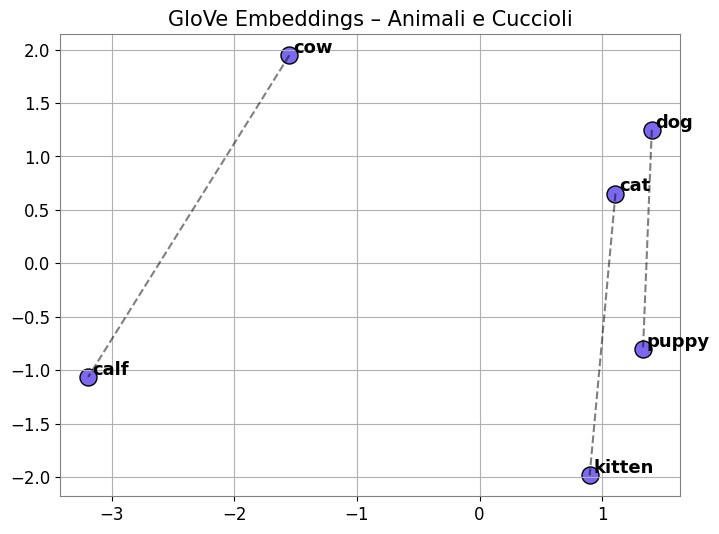

In [30]:
import torch
from torchtext.vocab import GloVe
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Setup grafico generale
plt.rcParams.update({
    "font.size": 12,
    "figure.facecolor": "white",
    "axes.edgecolor": "gray",
    "axes.grid": True
})

glove = GloVe(name='6B', dim=50)

# --- Set 1: Animali e cuccioli ---
animal_words = ["dog", "puppy", "cat", "kitten", "cow", "calf"]
animal_pairs = [("dog", "puppy"), ("cat", "kitten"), ("cow", "calf")]


animal_vectors = torch.stack([glove[w] for w in animal_words]).numpy()
pca_animal = PCA(n_components=2).fit_transform(animal_vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(animal_words):
    x, y = pca_animal[i]
    plt.scatter(x, y, color="mediumslateblue", s=150, edgecolors="k")
    plt.text(x + 0.03, y + 0.02, word, fontsize=13, weight='bold')
for a, b in animal_pairs:
    i, j = animal_words.index(a), animal_words.index(b)
    plt.plot([pca_animal[i][0], pca_animal[j][0]], [pca_animal[i][1], pca_animal[j][1]], 'k--', alpha=0.5)
plt.title("GloVe Embeddings – Animali e Cuccioli", fontsize=15)
plt.show()

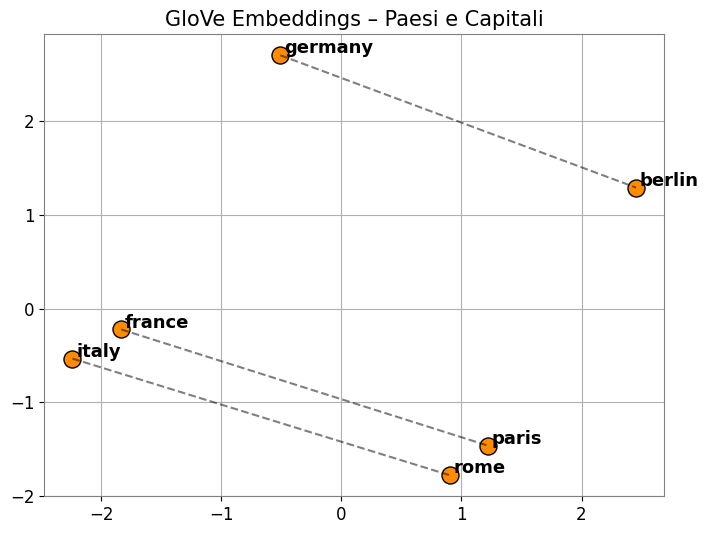

In [31]:
# --- Set 2: Paesi e capitali ---
geo_words = ["france", "paris", "italy", "rome", "germany", "berlin"]
geo_pairs = [("france", "paris"), ("italy", "rome"), ("germany", "berlin")]


geo_vectors = torch.stack([glove[w] for w in geo_words]).numpy()
pca_geo = PCA(n_components=2).fit_transform(geo_vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(geo_words):
    x, y = pca_geo[i]
    plt.scatter(x, y, color="darkorange", s=150, edgecolors="k")
    plt.text(x + 0.03, y + 0.02, word, fontsize=13, weight='bold')
for a, b in geo_pairs:
    i, j = geo_words.index(a), geo_words.index(b)
    plt.plot([pca_geo[i][0], pca_geo[j][0]], [pca_geo[i][1], pca_geo[j][1]], 'k--', alpha=0.5)
plt.title("GloVe Embeddings – Paesi e Capitali", fontsize=15)
plt.show()

# POSITIONAL ENCODING

In [48]:
# Frase
sentence = "Sarah carried a light bag walking under the light"
tokens = sentence.lower().split()

# Embedding GloVe
embeddings = torch.stack([glove[token] for token in tokens]).numpy()

# Positional Encoding
def positional_encoding(position, d_model):
    angle_rates = 1 / np.power(10000, (2 * (np.arange(d_model) // 2)) / np.float32(d_model))
    angle_rads = np.arange(position)[:, np.newaxis] * angle_rates[np.newaxis, :]
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return angle_rads

pos_enc = positional_encoding(len(tokens), embeddings.shape[1])
embedded_with_pos = embeddings + pos_enc

print(f"{'Word':<10} → {'Embedding[0:5]':<30} \t  → {'+ PosEnc[0:5]'}")
print("-" * 70)
for i, word in enumerate(tokens):
    emb = embeddings[i][:5]
    emb_pos = embedded_with_pos[i][:5]
    print(f"{word:<10} → {np.round(emb, 3)} → {np.round(emb_pos, 3)}")

Word       → Embedding[0:5]                 	  → + PosEnc[0:5]
----------------------------------------------------------------------
sarah      → [-0.467  1.666  0.129 -0.14   0.424] → [-0.467  2.666  0.129  0.86   0.424]
carried    → [ 0.628 -0.089  0.34  -0.53   0.07 ] → [1.47  0.452 0.978 0.24  0.531]
a          → [ 0.217  0.465 -0.468  0.101  1.014] → [1.126 0.049 0.515 0.287 1.831]
light      → [ 0.006  0.472 -0.073 -0.006  0.368] → [ 0.147 -0.518  0.802 -0.49   1.358]
bag        → [-0.028 -0.222  0.448 -0.185  0.999] → [-0.785 -0.875  0.813 -1.116  1.941]
walking    → [ 0.279  0.707 -0.307 -0.54   0.631] → [-0.68   0.99  -0.619 -1.49   1.311]
under      → [ 0.137 -0.295 -0.059 -0.592  0.023] → [-0.142  0.665 -0.906 -1.125  0.29 ]
the        → [ 0.418  0.25  -0.412  0.122  0.345] → [ 1.075  1.004 -1.404  0.252  0.138]
light      → [ 0.006  0.472 -0.073 -0.006  0.368] → [ 0.996  0.327 -0.754  0.727 -0.267]


# ATTENTION

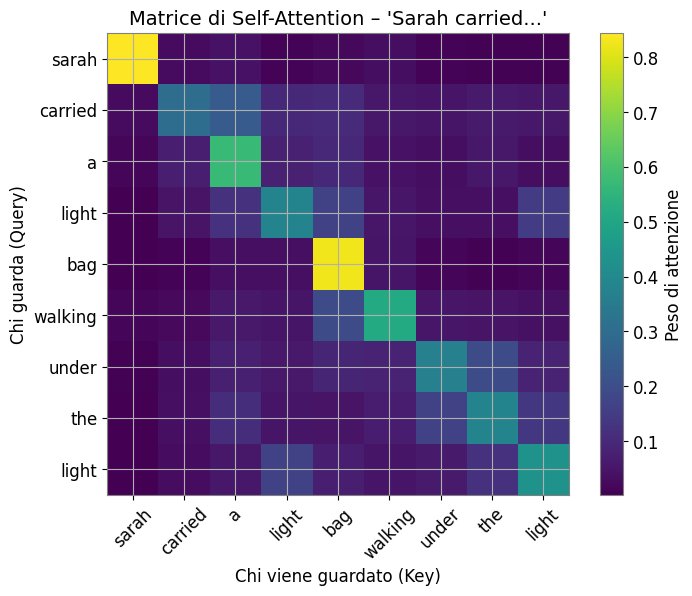

In [49]:
import torch.nn.functional as F

# 1. Converti in torch tensor
X = torch.tensor(embedded_with_pos, dtype=torch.float32)  # shape: (seq_len, d_model)

# 2. Query, Key, Value = X (self-attention semplice)
Q = X
K = X
V = X

# 3. Calcolo attention weights
d_k = X.shape[1]
scores = Q @ K.T / np.sqrt(d_k)        # shape: (seq_len, seq_len)
attention_weights = F.softmax(scores, dim=-1)  # normalizza sulle righe

# 4. Visualizza matrice di attenzione
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(attention_weights.detach().numpy(), cmap='viridis')
plt.xticks(ticks=range(len(tokens)), labels=tokens, rotation=45)
plt.yticks(ticks=range(len(tokens)), labels=tokens)
plt.title("Matrice di Self-Attention – 'Sarah carried...'", fontsize=14)
plt.colorbar(label="Peso di attenzione")
plt.xlabel("Chi viene guardato (Key)")
plt.ylabel("Chi guarda (Query)")
plt.show()

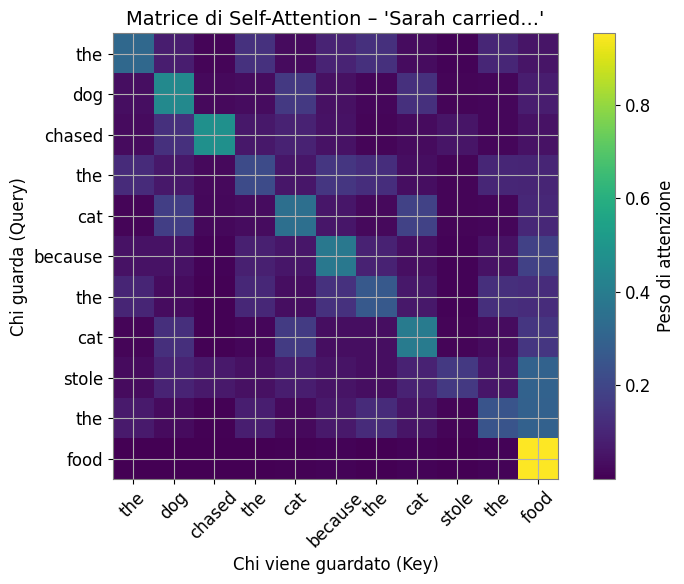

In [51]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchtext.vocab import GloVe
import numpy as np

# 1. Carica GloVe
glove = GloVe(name='6B', dim=50)

# 2. Frase
sentence = "The dog chased the cat because the cat stole the food"
tokens = sentence.lower().split()

# 3. Embedding GloVe
embeddings = torch.stack([glove[token] for token in tokens]).numpy()

# 4. Positional Encoding
def positional_encoding(position, d_model):
    angle_rates = 1 / np.power(10000, (2 * (np.arange(d_model)//2)) / np.float32(d_model))
    angle_rads = np.arange(position)[:, np.newaxis] * angle_rates[np.newaxis, :]
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return angle_rads

pos_enc = positional_encoding(len(tokens), embeddings.shape[1])
embedded_with_pos = embeddings + pos_enc

# 5. Self-attention
X = torch.tensor(embedded_with_pos, dtype=torch.float32)
Q = K = V = X
d_k = X.shape[1]
scores = Q @ K.T / np.sqrt(d_k)
attention_weights = F.softmax(scores, dim=-1)

# 6. Visualizza la matrice di attenzione
plt.figure(figsize=(8, 6))
plt.imshow(attention_weights.detach().numpy(), cmap='viridis')
plt.xticks(ticks=range(len(tokens)), labels=tokens, rotation=45)
plt.yticks(ticks=range(len(tokens)), labels=tokens)
plt.title("Matrice di Self-Attention – 'Sarah carried...'", fontsize=14)
plt.colorbar(label="Peso di attenzione")
plt.xlabel("Chi viene guardato (Key)")
plt.ylabel("Chi guarda (Query)")
plt.tight_layout()
plt.show()

In [57]:
# Calcolo dell'output dell'attenzione (già fatto)
# attention_output = attention_weights @ V

# Stampa comparativa pulita (prime 5 dimensioni)
print(f"{'Word':<10} → {'Original[0:5]':<45} → {'AttentionOut[0:5]'}")
print("-" * 100)
for i, word in enumerate(tokens):
    original = embedded_with_pos[i][:5]  # già numpy
    updated = attention_output[i][:5].detach().numpy()  # solo questo è torch
    print(f"{word:<10} → {np.round(original, 4)} → {np.round(updated, 4)}")

Word       → Original[0:5]                                 → AttentionOut[0:5]
----------------------------------------------------------------------------------------------------
the        → [ 0.418   1.2497 -0.4124  1.1217  0.3453] → [ 0.3877  0.2817 -0.3243  0.3118  0.5088]
dog        → [0.9516 0.1525 0.0618 0.4929 1.1658] → [ 0.5865 -0.2028 -0.1826  0.1216  0.8022]
chased     → [ 0.9644 -1.8077  1.9698 -0.3374  1.3874] → [ 0.6725 -1.0483  0.911  -0.1421  1.068 ]
the        → [ 0.5591 -0.7403  0.4629 -0.3618  1.3362] → [ 0.3124 -0.1616 -0.1866 -0.0171  0.5987]
cat        → [-0.304  -1.1547 -0.1715 -0.9465  1.1634] → [ 0.3123 -0.4962 -0.3268 -0.2128  0.6957]
because    → [-0.4299 -0.0178 -0.2561 -1.129   0.8372] → [ 0.0281 -0.2425 -0.2439 -0.3191  0.5194]
the        → [ 0.1386  1.2099 -1.2589 -0.4107  0.6118] → [ 0.2764  0.0915 -0.4981  0.0112  0.4059]
cat        → [ 1.1098  0.2528 -1.5286  0.1144  0.0146] → [ 0.5511 -0.2586 -0.6644  0.0362  0.3426]
stole      → [ 0.7864 -0.6823  0.

In [59]:
from numpy.linalg import norm

# Calcola le distanze
word_deltas = []
for i, word in enumerate(tokens):
    original = embedded_with_pos[i]
    updated = attention_output[i].detach().numpy()
    distance = norm(updated - original)
    word_deltas.append((word, distance))

# Ordina decrescente
word_deltas.sort(key=lambda x: -x[1])

# Stampa
print(f"{'Word':<10} → Δ distanza (||new - old||)")
print("-" * 45)
for word, dist in word_deltas:
    print(f"{word:<10} → {dist:.4f}")

Word       → Δ distanza (||new - old||)
---------------------------------------------
stole      → 3.3657
chased     → 2.5977
the        → 2.3484
the        → 2.3374
because    → 2.1701
the        → 2.1428
the        → 2.0829
cat        → 1.9710
cat        → 1.9131
dog        → 1.8873
food       → 0.2601
